In [ ]:
import pip
def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])   

import_or_install('importlib')
import_or_install('sys')
import_or_install('os')
import_or_install('pandas')
import_or_install('importlib')
import_or_install("numpy")
import_or_install("matplotlib")
import_or_install("sklearn")
import_or_install("pandas_market_calendars")
import_or_install("scipy")
import_or_install("datetime")
import_or_install("dateutil")
import_or_install("schedule")

import importlib
import sys
import os,sys
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))

In [ ]:
import importlib
import numpy as np
import pandas as pd
import TradingStrategy as ts
import Common.ApiClient as ac
import MA.ExponentialMovingAverageStrategy as ema
import MA.SimpleMovingAverageStrategy as sma
import PaperTrader as pTrader

pd.options.mode.chained_assignment = None 
importlib.reload(ts)
importlib.reload(ac)
importlib.reload(ema)
importlib.reload(sma)

In [4]:
Api_Key =''
Secret_Key=''
endpoint='https://paper-api.alpaca.markets'
client = ac.ApiClient(api_key_Id=Api_Key,api_key_secret=Secret_Key)

# EMA Based Machine Learning Model

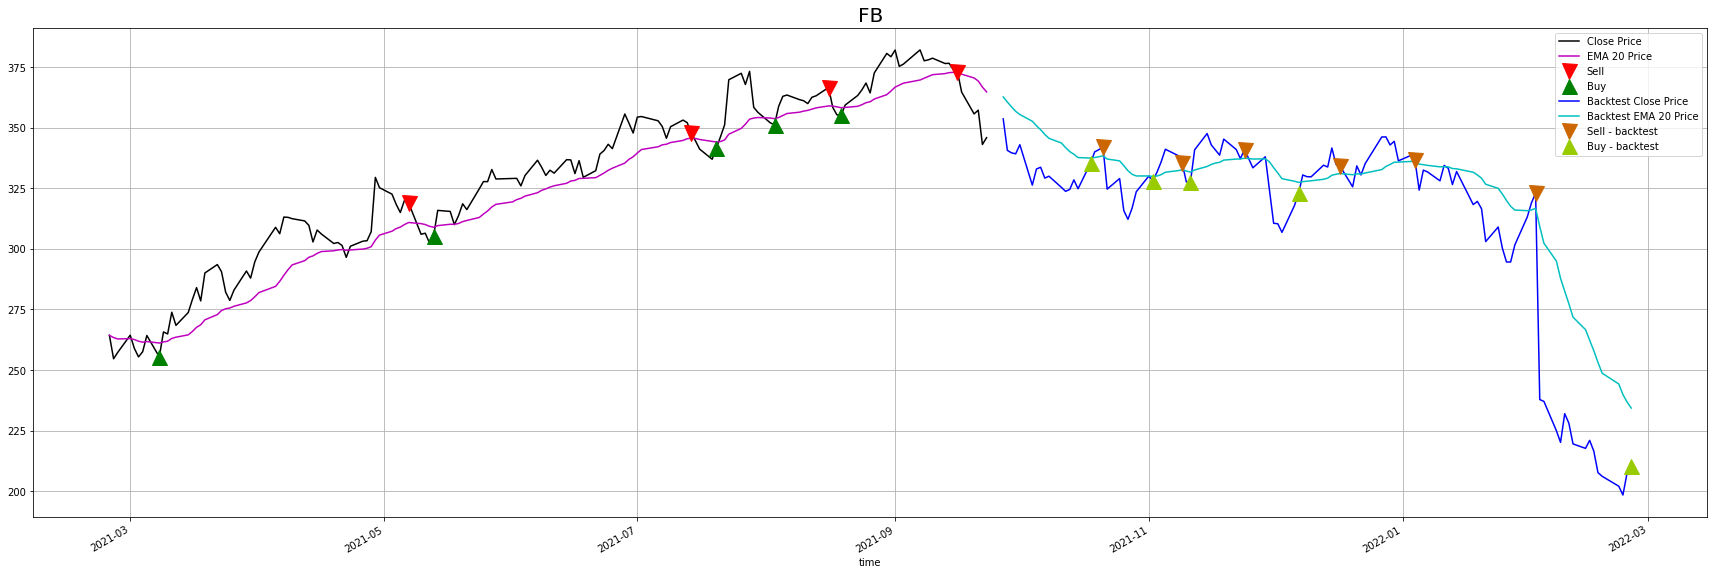

Buy and hold strategy returns for the backtest: -51.9%
EMA based model strategy returns for the backtest: 11.4%


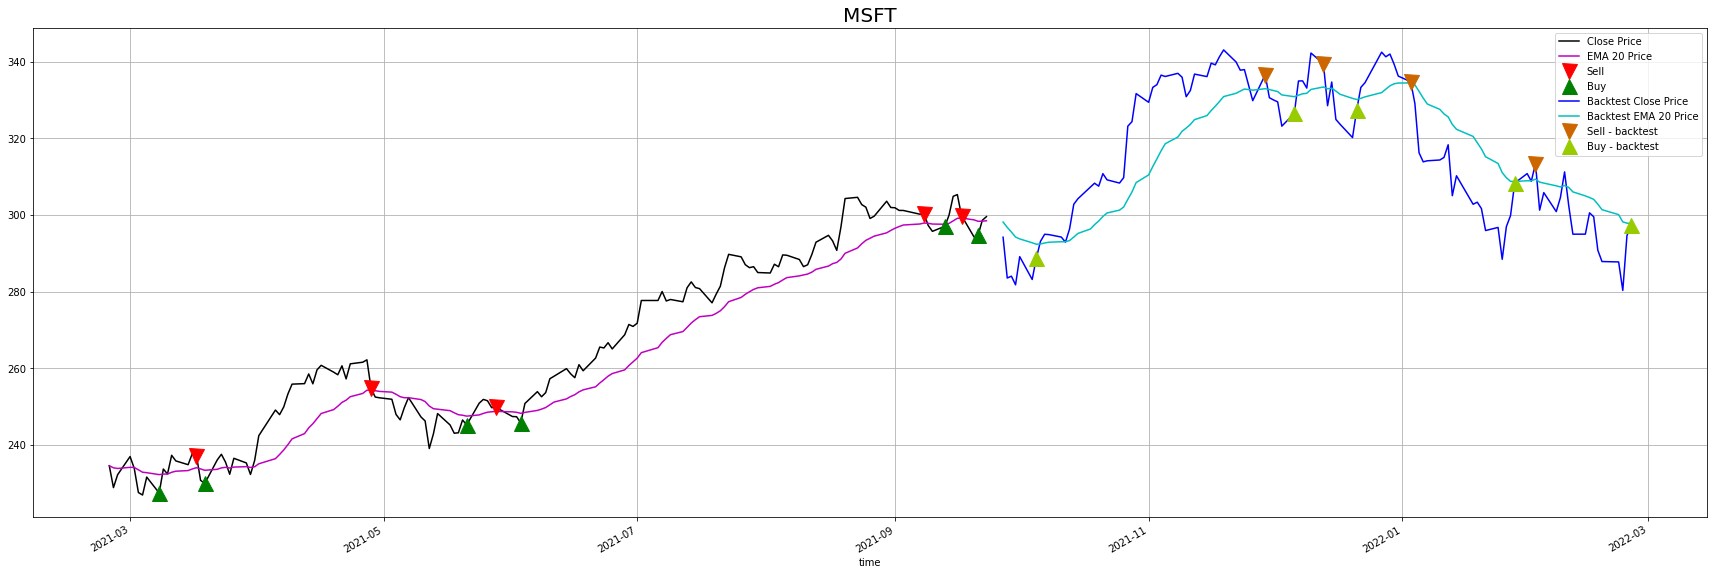

Buy and hold strategy returns for the backtest: -0.4%
EMA based model strategy returns for the backtest: 23.1%


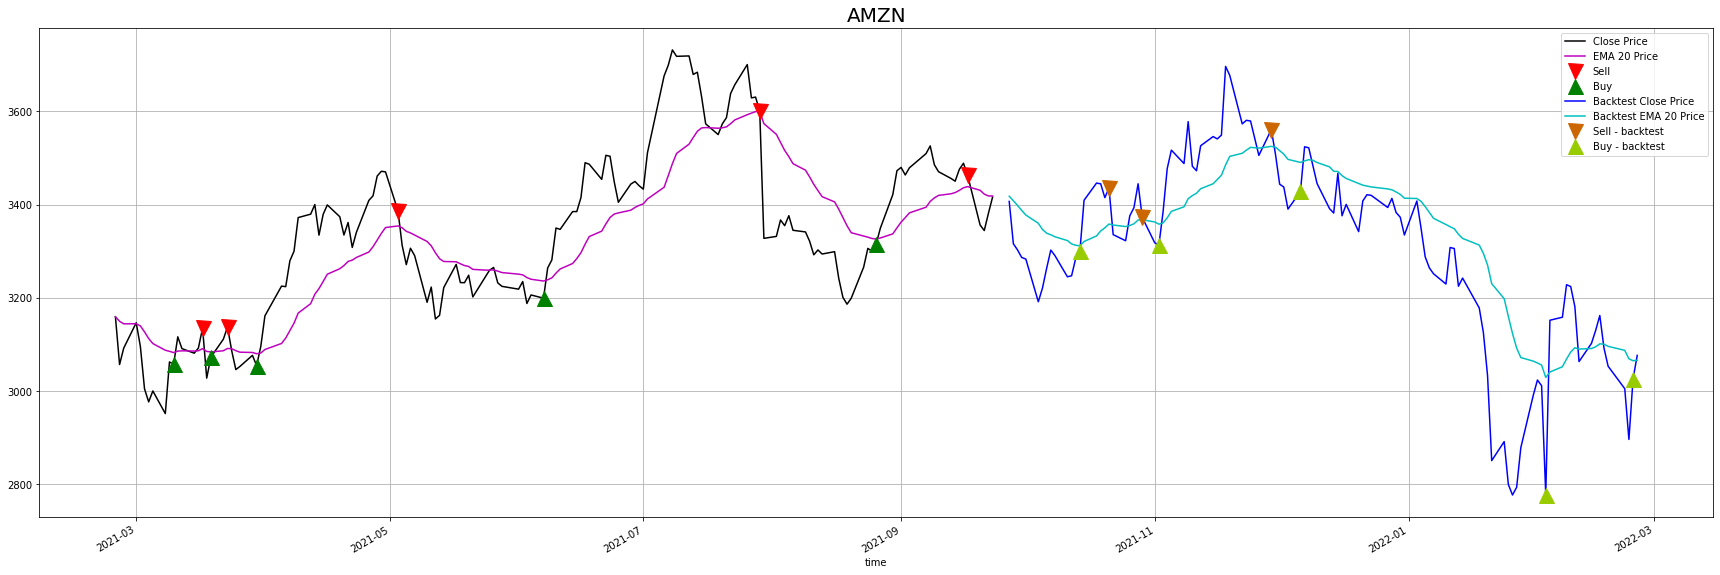

Buy and hold strategy returns for the backtest: -10.8%
EMA based model strategy returns for the backtest: 0.2%


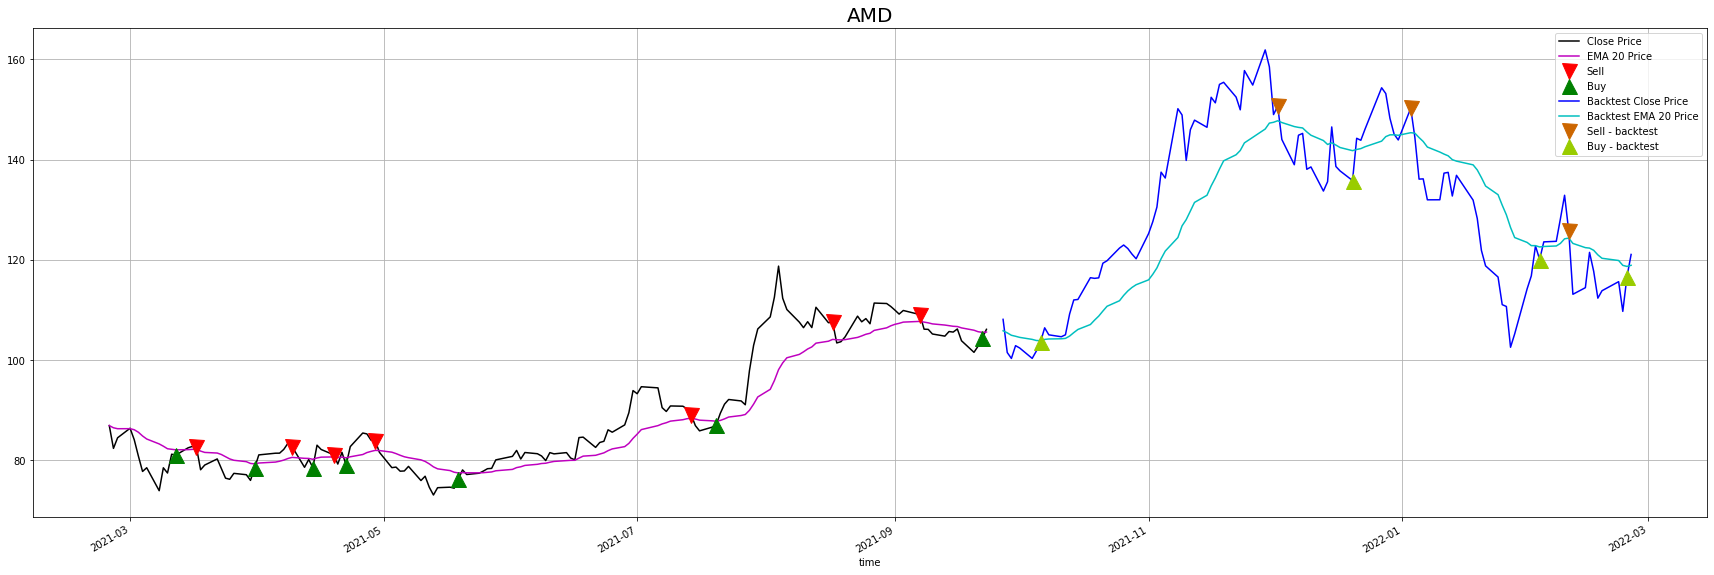

Buy and hold strategy returns for the backtest: 13.5%
EMA based model strategy returns for the backtest: 56.0%


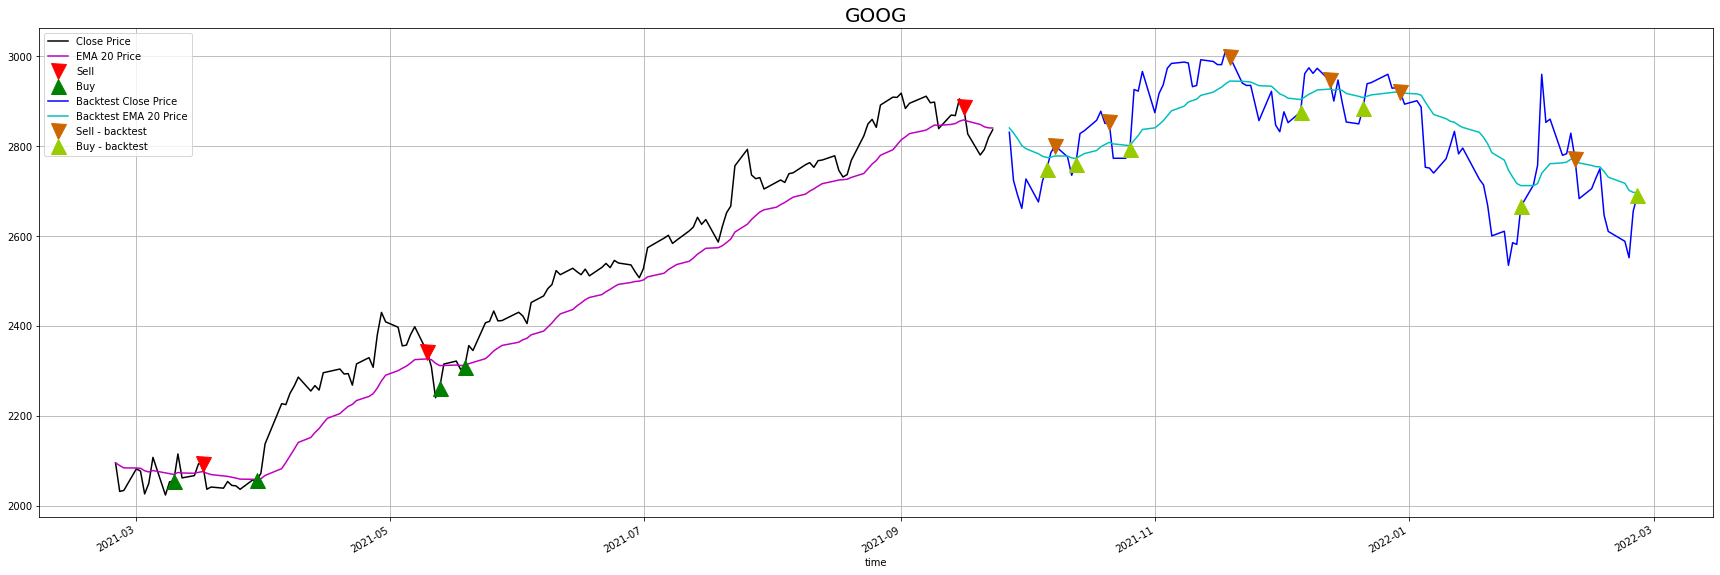

Buy and hold strategy returns for the backtest: -5.7%
EMA based model strategy returns for the backtest: 19.8%


In [24]:
for ticker in ["FB","MSFT","AMZN","AMD","GOOG"]:
    df= client. get_closing_price(ticker,255)
    ema_instance = ema.ExponentialMovingAverageStrategy(df=df,ticker=ticker) 
    test, pred_label=ema_instance.generate_train_model(ticker=ticker)  
    print(f'Buy and hold strategy returns for the backtest: {(test["daily_profit"].sum()*100).round(3)}%')
    print(f'EMA based model strategy returns for the backtest: {(test["strategy_profit"].sum()*100).round(3)}%') 



Profit based on STL ML at last 5 months: 24.23%


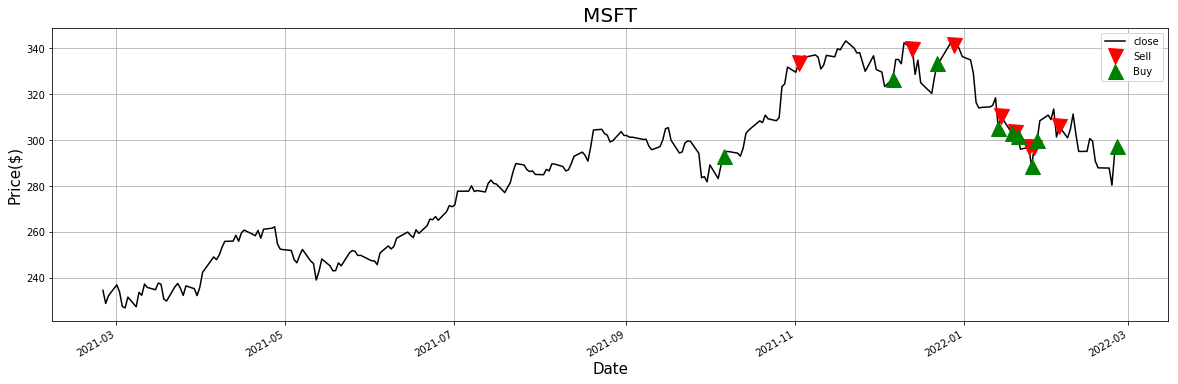

Profit based on STL ML at last 5 months: 23.62%


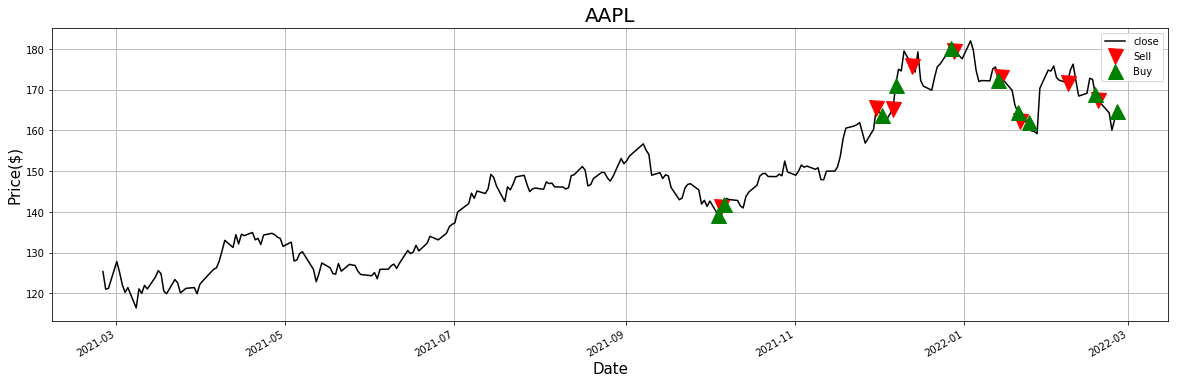

Profit based on STL ML at last 5 months: 18.87%


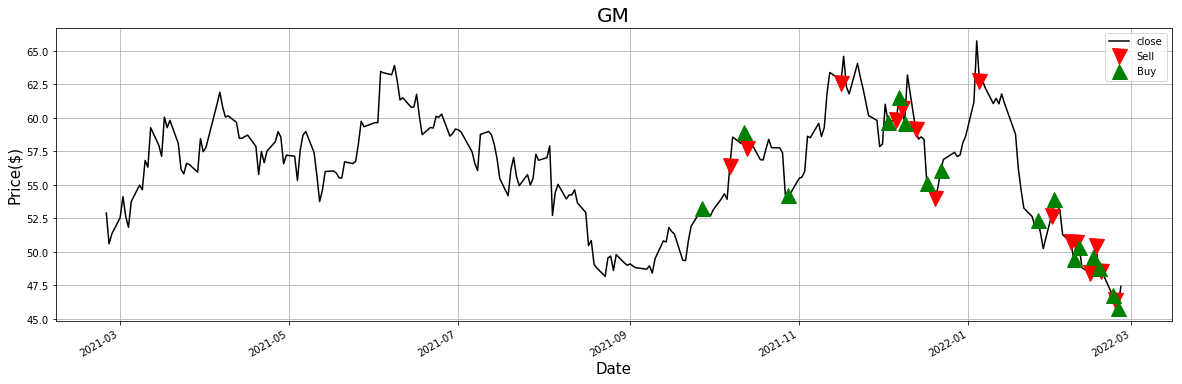

Profit based on STL ML at last 5 months: 16.36%


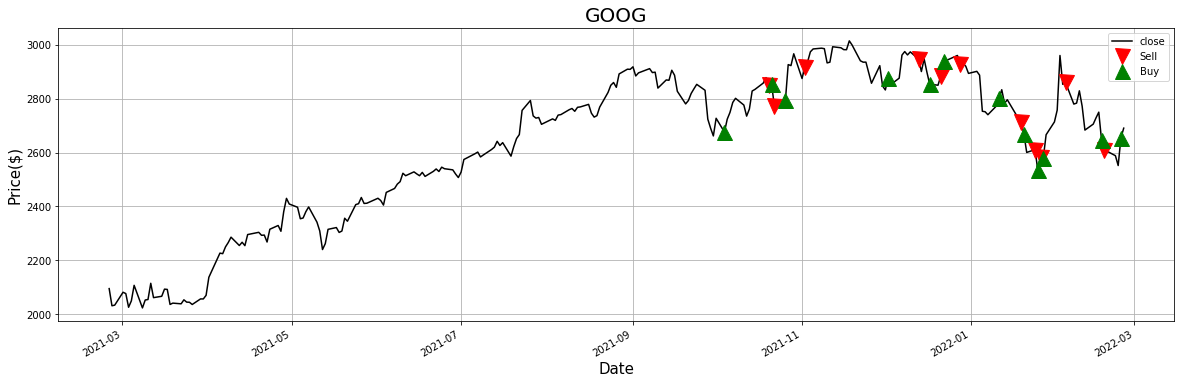

Profit based on STL ML at last 5 months: 21.75%


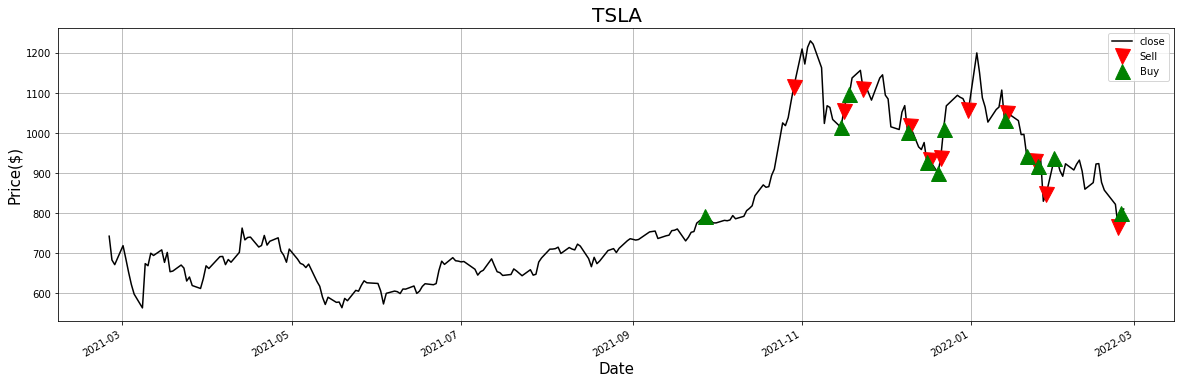

totl profit:104.83%


In [8]:
total = 0
from STL.StlMl import STL_strategy
for s,ticker in enumerate([ "MSFT","AAPL","GM","GOOG","TSLA"]):
    df= client.get_closing_price(ticker,255)
    df.index=pd.to_datetime(df.index,utc=True)
    stl = STL_strategy(ticker,df,'close',10,3)  
    total += stl.backtest()
print('totl profit:{:.2f}%'.format(total*100))

# Running Paper trading

In [ ]:
#uncomment the code for running the trade job

In [ ]:
#p = pTrader.PaperTrader()
#p.run_trading()